In [122]:
import pandas as pd
import numpy as np

df = pd.read_csv('train-chennai-sale.csv')
pd.set_option('display.max_columns', None)

In [123]:
df.dropna(inplace = True)

In [124]:
df.AREA = df.AREA.str.lower()
df.AREA.unique()

array(['karapakkam', 'anna nagar', 'adyar', 'velachery', 'chrompet',
       'kk nagar', 'tnagar', 't nagar', 'chrompt', 'chrmpet', 'karapakam',
       'ana nagar', 'chormpet', 'adyr', 'velchery', 'ann nagar',
       'kknagar'], dtype=object)

In [125]:
df.AREA= df.AREA.replace({'karapakam':'karapakkam',
                            'adyr':'adyar',
                            'ann nagar':'anna nagar',
                            'ana nagar':'anna nagar',
                            'chrompt':'chrompet',
                            'chormpet':'chrompet',
                            'chrmpet':'chrompet',
                            'kknagar':'kk nagar',
                            'tnagar':'t nagar',
                            'velchery':'velachery'})
df.AREA.unique()

array(['karapakkam', 'anna nagar', 'adyar', 'velachery', 'chrompet',
       'kk nagar', 't nagar'], dtype=object)

In [126]:
df.SALE_COND = df.SALE_COND.str.lower()
df.SALE_COND.unique()

array(['abnormal', 'family', 'partial', 'adjland', 'normal sale',
       'ab normal', 'partiall', 'adj land'], dtype=object)

In [127]:
df.SALE_COND = df.SALE_COND.replace({'adj land':'adjland', 
                       'partiall':'partial',
                       'ab normal':'abnormal'})
df.SALE_COND.unique()

array(['abnormal', 'family', 'partial', 'adjland', 'normal sale'],
      dtype=object)

In [128]:
df.PARK_FACIL = df.PARK_FACIL.str.lower()
df.PARK_FACIL.unique()

array(['yes', 'no', 'noo'], dtype=object)

In [129]:
df.PARK_FACIL = df.PARK_FACIL.replace({'noo':'no'})
df.PARK_FACIL.unique()

array(['yes', 'no'], dtype=object)

In [130]:
df.BUILDTYPE = df.BUILDTYPE.str.lower()
df.BUILDTYPE.unique()

array(['commercial', 'others', 'other', 'house', 'comercial'],
      dtype=object)

In [131]:
df.BUILDTYPE = df.BUILDTYPE.replace({'comercial':'commercial', 
                       'others':'other'})
df.BUILDTYPE.unique()

array(['commercial', 'other', 'house'], dtype=object)

In [132]:
df.UTILITY_AVAIL = df.UTILITY_AVAIL.str.lower()
df.UTILITY_AVAIL.unique()

array(['allpub', 'elo', 'nosewr ', 'nosewa', 'all pub'], dtype=object)

In [133]:
df.UTILITY_AVAIL = df.UTILITY_AVAIL.replace({'all pub':'allpub',
                                             'nosewr ':'nosewa'})
df.UTILITY_AVAIL.unique()

array(['allpub', 'elo', 'nosewa'], dtype=object)

In [134]:
df.STREET = df.STREET.str.lower()
df.STREET.unique()

array(['paved', 'gravel', 'no access', 'pavd', 'noaccess'], dtype=object)

In [135]:
df.STREET = df.STREET.replace({'pavd':'paved', 
                               'noaccess': 'no access'})
df.STREET.unique()

array(['paved', 'gravel', 'no access'], dtype=object)

In [136]:
df.MZZONE = df.MZZONE.str.lower()
df.MZZONE.unique()

array(['a', 'rh', 'rl', 'i', 'c', 'rm'], dtype=object)

In [137]:
df.N_BEDROOM = df.N_BEDROOM.astype(int)
df.N_BATHROOM = df.N_BATHROOM.astype(int)

In [138]:
df.DATE_BUILD = pd.to_datetime(df.DATE_BUILD, format='%d-%m-%Y')
df.DATE_SALE = pd.to_datetime(df.DATE_SALE, format='%d-%m-%Y')

In [139]:
df.dtypes

PRT_ID                   object
AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
dtype: object

In [140]:
df['AGE'] = pd.DatetimeIndex(df.DATE_SALE).year - pd.DatetimeIndex(df.DATE_BUILD).year
df.AGE

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: AGE, Length: 7056, dtype: int64

In [141]:
df['TOTAL_PRICE'] = pd.DataFrame(df.REG_FEE +df.COMMIS + df.SALES_PRICE)
df.TOTAL_PRICE

0        8124400
1       22781941
2       13672408
3       10063653
4        7717313
          ...   
7104     5668827
7105    11370222
7106     8835792
7107     9051448
7108    10405469
Name: TOTAL_PRICE, Length: 7056, dtype: int64

In [142]:
del df['PRT_ID']

In [143]:
df = df.reindex(columns = ['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 
       'DATE_BUILD', 'DATE_SALE', 'AGE', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM','N_BATHROOM', 'N_ROOM', 
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'TOTAL_PRICE'])

In [144]:
df

AREA    SALE_COND PARK_FACIL   BUILDTYPE UTILITY_AVAIL     STREET  \
0     karapakkam     abnormal        yes  commercial        allpub      paved   
1     anna nagar     abnormal         no  commercial        allpub     gravel   
2          adyar     abnormal        yes  commercial           elo     gravel   
3      velachery       family         no       other        nosewa      paved   
4     karapakkam     abnormal        yes       other        allpub     gravel   
...          ...          ...        ...         ...           ...        ...   
7104  karapakkam      adjland         no       other           elo  no access   
7105   velachery       family        yes       other        nosewa  no access   
7106   velachery  normal sale         no       house        nosewa     gravel   
7107  karapakkam      partial        yes  commercial           elo      paved   
7108   velachery      partial        yes       other           elo      paved   

     MZZONE DATE_BUILD  DATE_SALE  AGE  INT_SQFT  DIST_MAINROAD  N_BEDROOM  \
0         a 1967-05-15 2011-05-04   44      1004            131          1   
1        rh 1995-12-22 2006-12-19   11      1986             26          2   
2        rl 1992-02-09 2012-02-04   20       909             70          1   
3         i 1988-03-18 2010-03-13   22      1855             14          3   
4         c 1979-10-13 2009-10-05   30      1226             84          1   
...     ...        ...        ...  ...       ...            ...        ...   
7104     rm 1962-01-15 2011-01-03   49       598             51          1   
7105     rh 1995-04-11 2004-04-08    9      1897             52          3   
7106      i 1978-09-01 2006-08-25   28      1614            152          2   
7107     rl 1977-08-11 2009-08-03   32       787             40          1   
7108      i 1961-07-24 2005-07-13   44      1896            156          3   

      N_BATHROOM  N_ROOM  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  \
0              1       3       4.0          3.9         4.9       4.330   
1              1       5       4.9          4.2         2.5       3.765   
2              1       3       4.1          3.8         2.2       3.090   
3              2       5       4.7          3.9         3.6       4.010   
4              1       3       3.0          2.5         4.1       3.290   
...          ...     ...       ...          ...         ...         ...   
7104           1       2       3.0          2.2         2.4       2.520   
7105           2       5       3.6          4.5         3.3       3.920   
7106           1       4       4.3          4.2         2.9       3.840   
7107           1       2       4.6          3.8         4.1       4.160   
7108           2       5       3.1          3.5         4.3       3.640   

      REG_FEE  COMMIS  SALES_PRICE  TOTAL_PRICE  
0      380000  144400      7600000      8124400  
1      760122  304049     21717770     22781941  
2      421094   92114     13159200     13672408  
3      356321   77042      9630290     10063653  
4      237000   74063      7406250      7717313  
...       ...     ...          ...          ...  
7104   208767  107060      5353000      5668827  
7105   346191  205551     10818480     11370222  
7106   317354  167028      8351410      8835792  
7107   425350  119098      8507000      9051448  
7108   349177   79812      9976480     10405469  

[7056 rows x 23 columns]

**Exploratory Data Analysis**

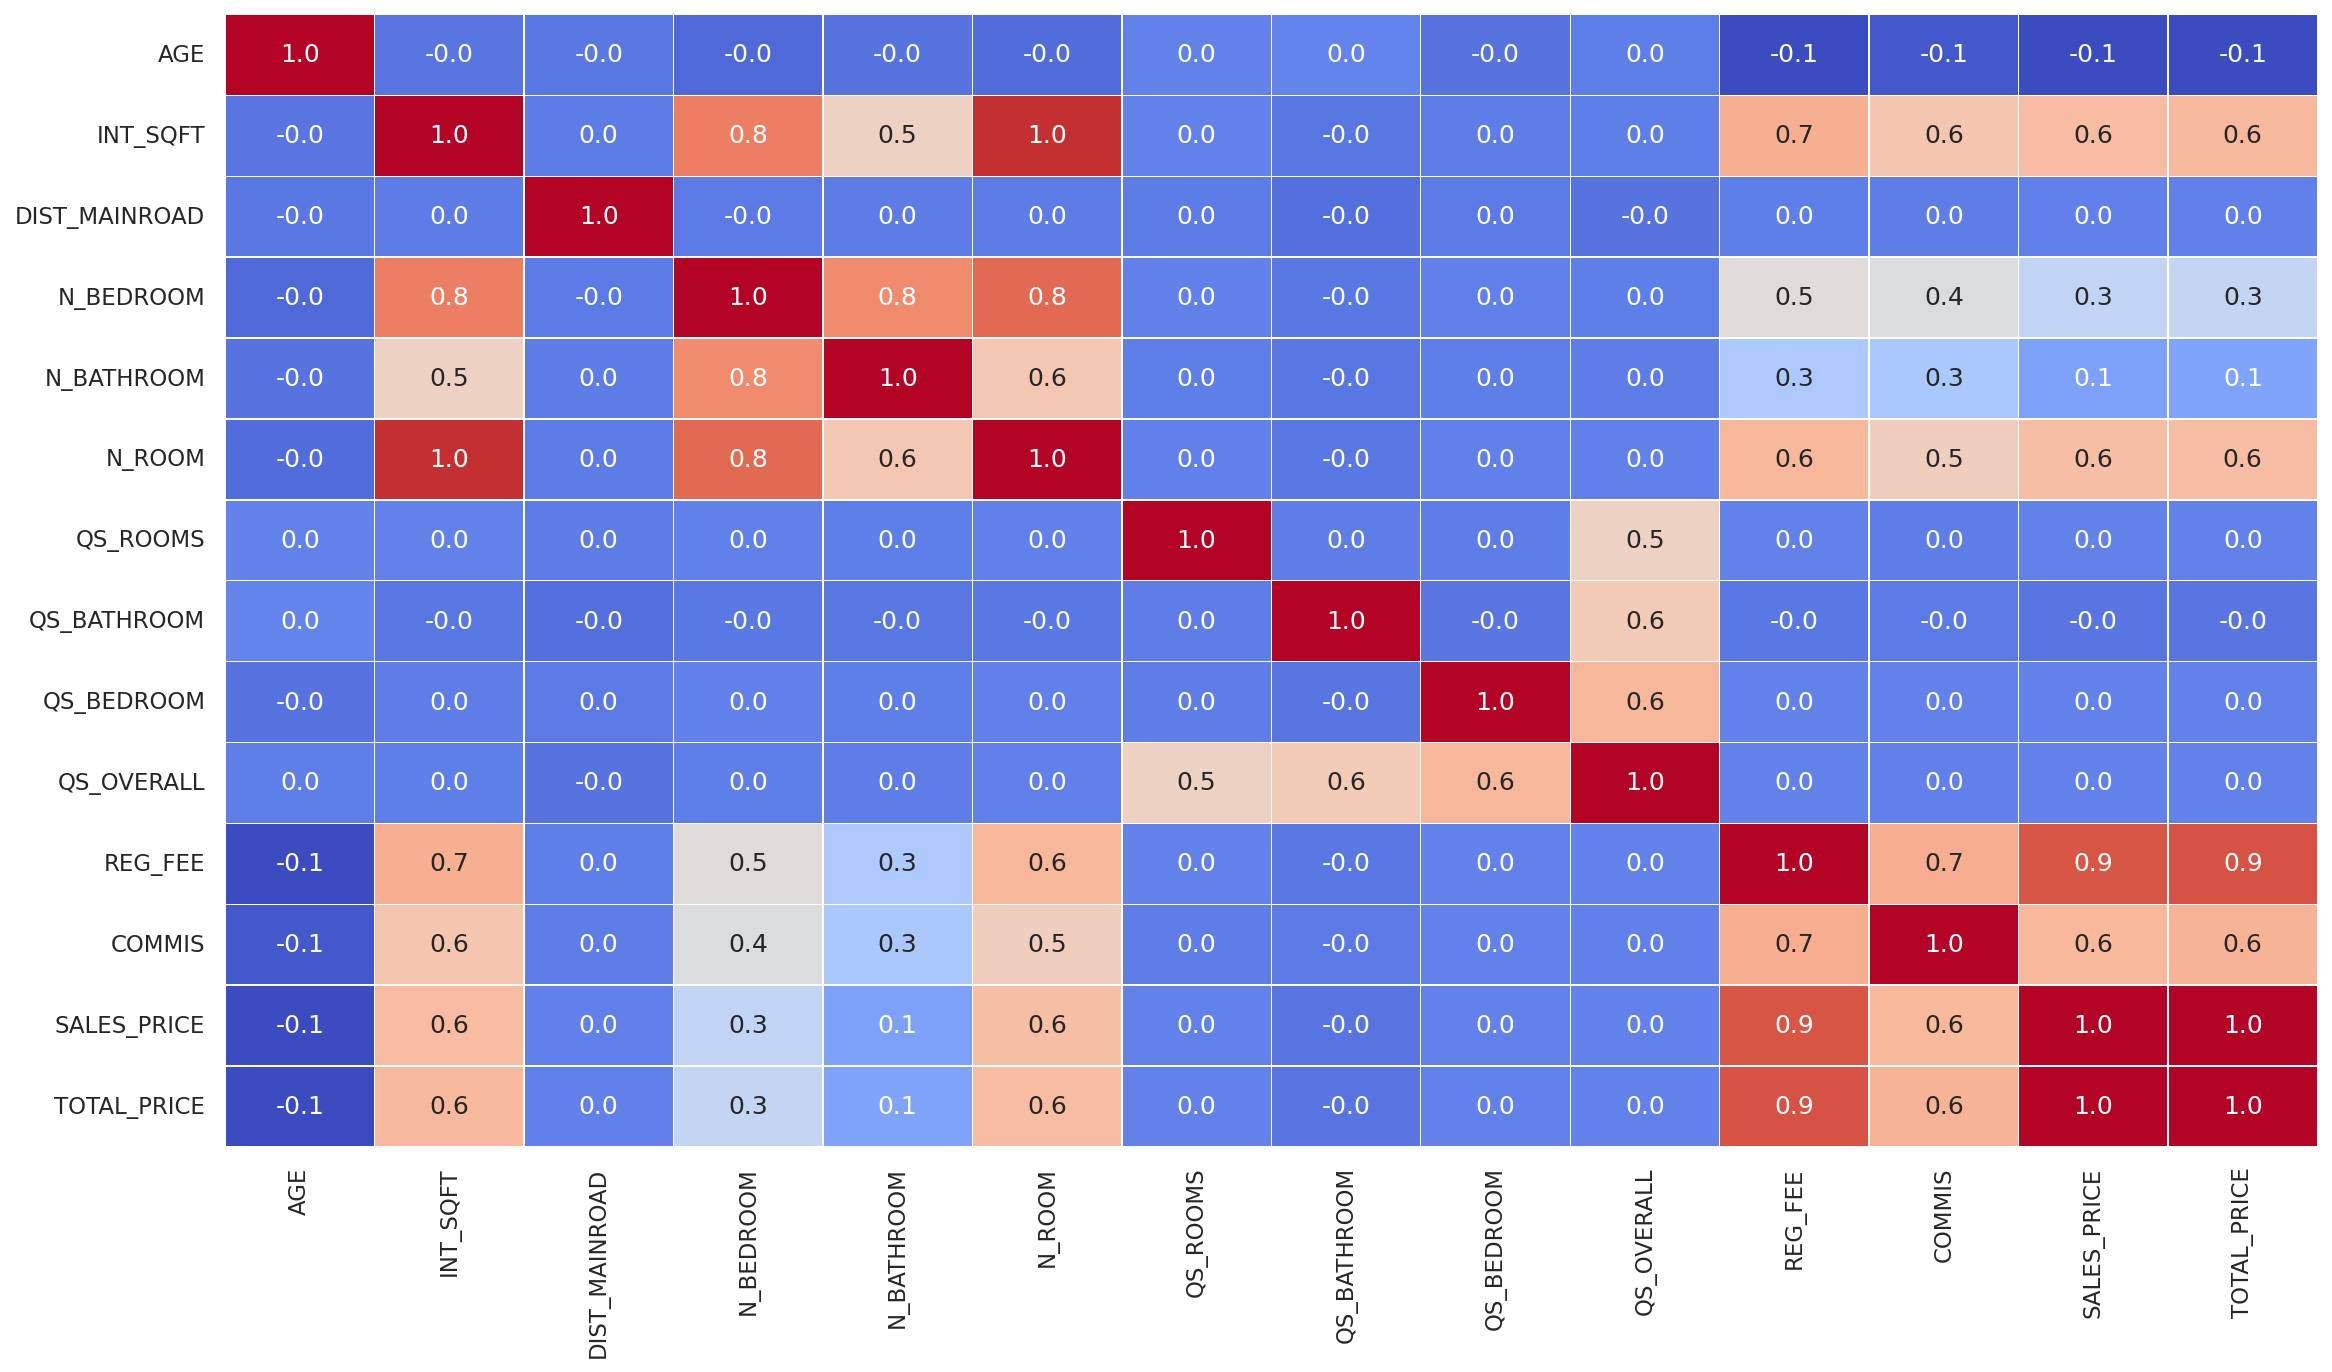

In [145]:
import math
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")

import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(18,10), dpi=150)
sns.heatmap(df.corr(method='pearson'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, cmap='coolwarm');

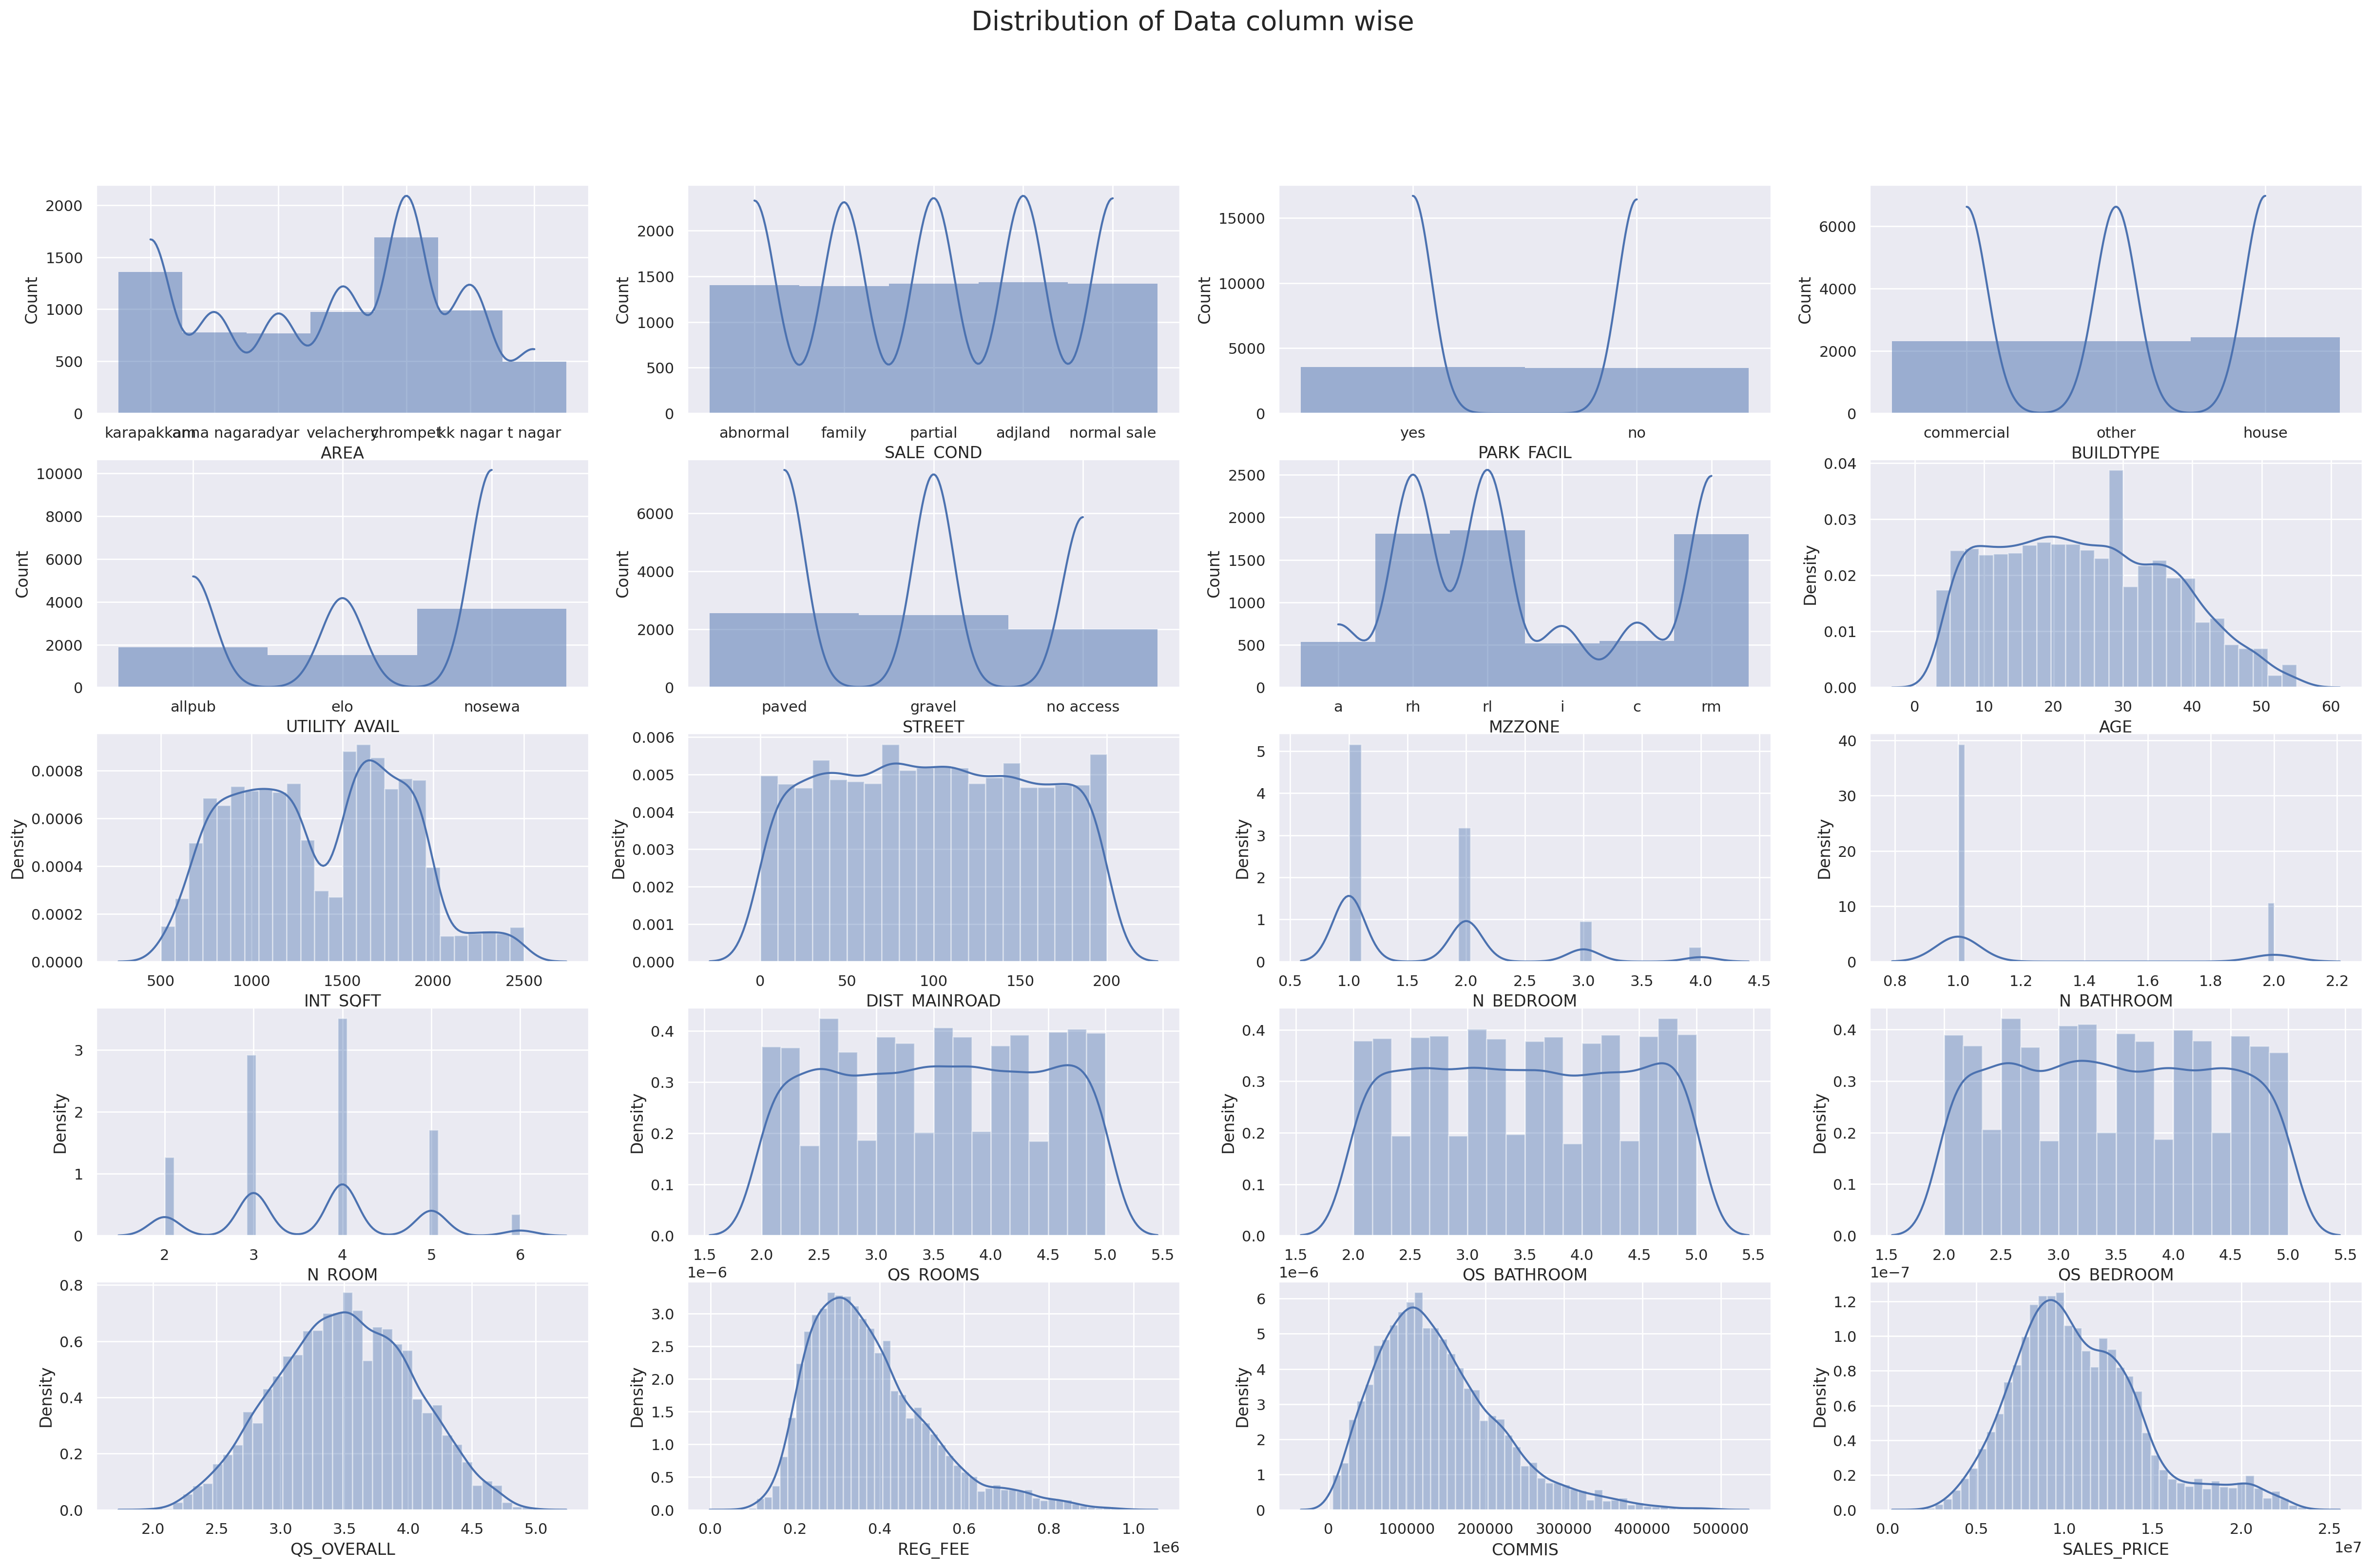

In [146]:
plt.figure(figsize=(30, 18), dpi=200)

plt.subplot(5,4,1)
sns.histplot(df.AREA, linewidth=0,kde=True)

plt.subplot(5,4,2)
sns.histplot(df.SALE_COND, linewidth=0,kde=True)

plt.subplot(5,4,3)
sns.histplot(df.PARK_FACIL, linewidth=0,kde=True)

plt.subplot(5,4,4)
sns.histplot(df.BUILDTYPE, linewidth=0,kde=True)

plt.subplot(5,4,5)
sns.histplot(df.UTILITY_AVAIL, linewidth=0,kde=True)

plt.subplot(5,4,6)
sns.histplot(df.STREET, linewidth=0,kde=True)

plt.subplot(5,4,7)
sns.histplot(df.MZZONE, linewidth=0,kde=True)

plt.subplot(5,4,8)
sns.distplot(df.AGE)

plt.subplot(5,4,9)
sns.distplot(df.INT_SQFT)

plt.subplot(5,4,10)
sns.distplot(df.DIST_MAINROAD)

plt.subplot(5,4,11)
sns.distplot(df.N_BEDROOM)

plt.subplot(5,4,12)
sns.distplot(df.N_BATHROOM)

plt.subplot(5,4,13)
sns.distplot(df.N_ROOM)

plt.subplot(5,4,14)
sns.distplot(df.QS_ROOMS)

plt.subplot(5,4,15)
sns.distplot(df.QS_BATHROOM)

plt.subplot(5,4,16)
sns.distplot(df.QS_BEDROOM)

plt.subplot(5,4,17)
sns.distplot(df.QS_OVERALL)

plt.subplot(5,4,18)
sns.distplot(df.REG_FEE)

plt.subplot(5,4,19)
sns.distplot(df.COMMIS)

plt.subplot(5,4,20)
sns.distplot(df.SALES_PRICE)

plt.suptitle("Distribution of Data column wise", fontsize=20)
plt.show()

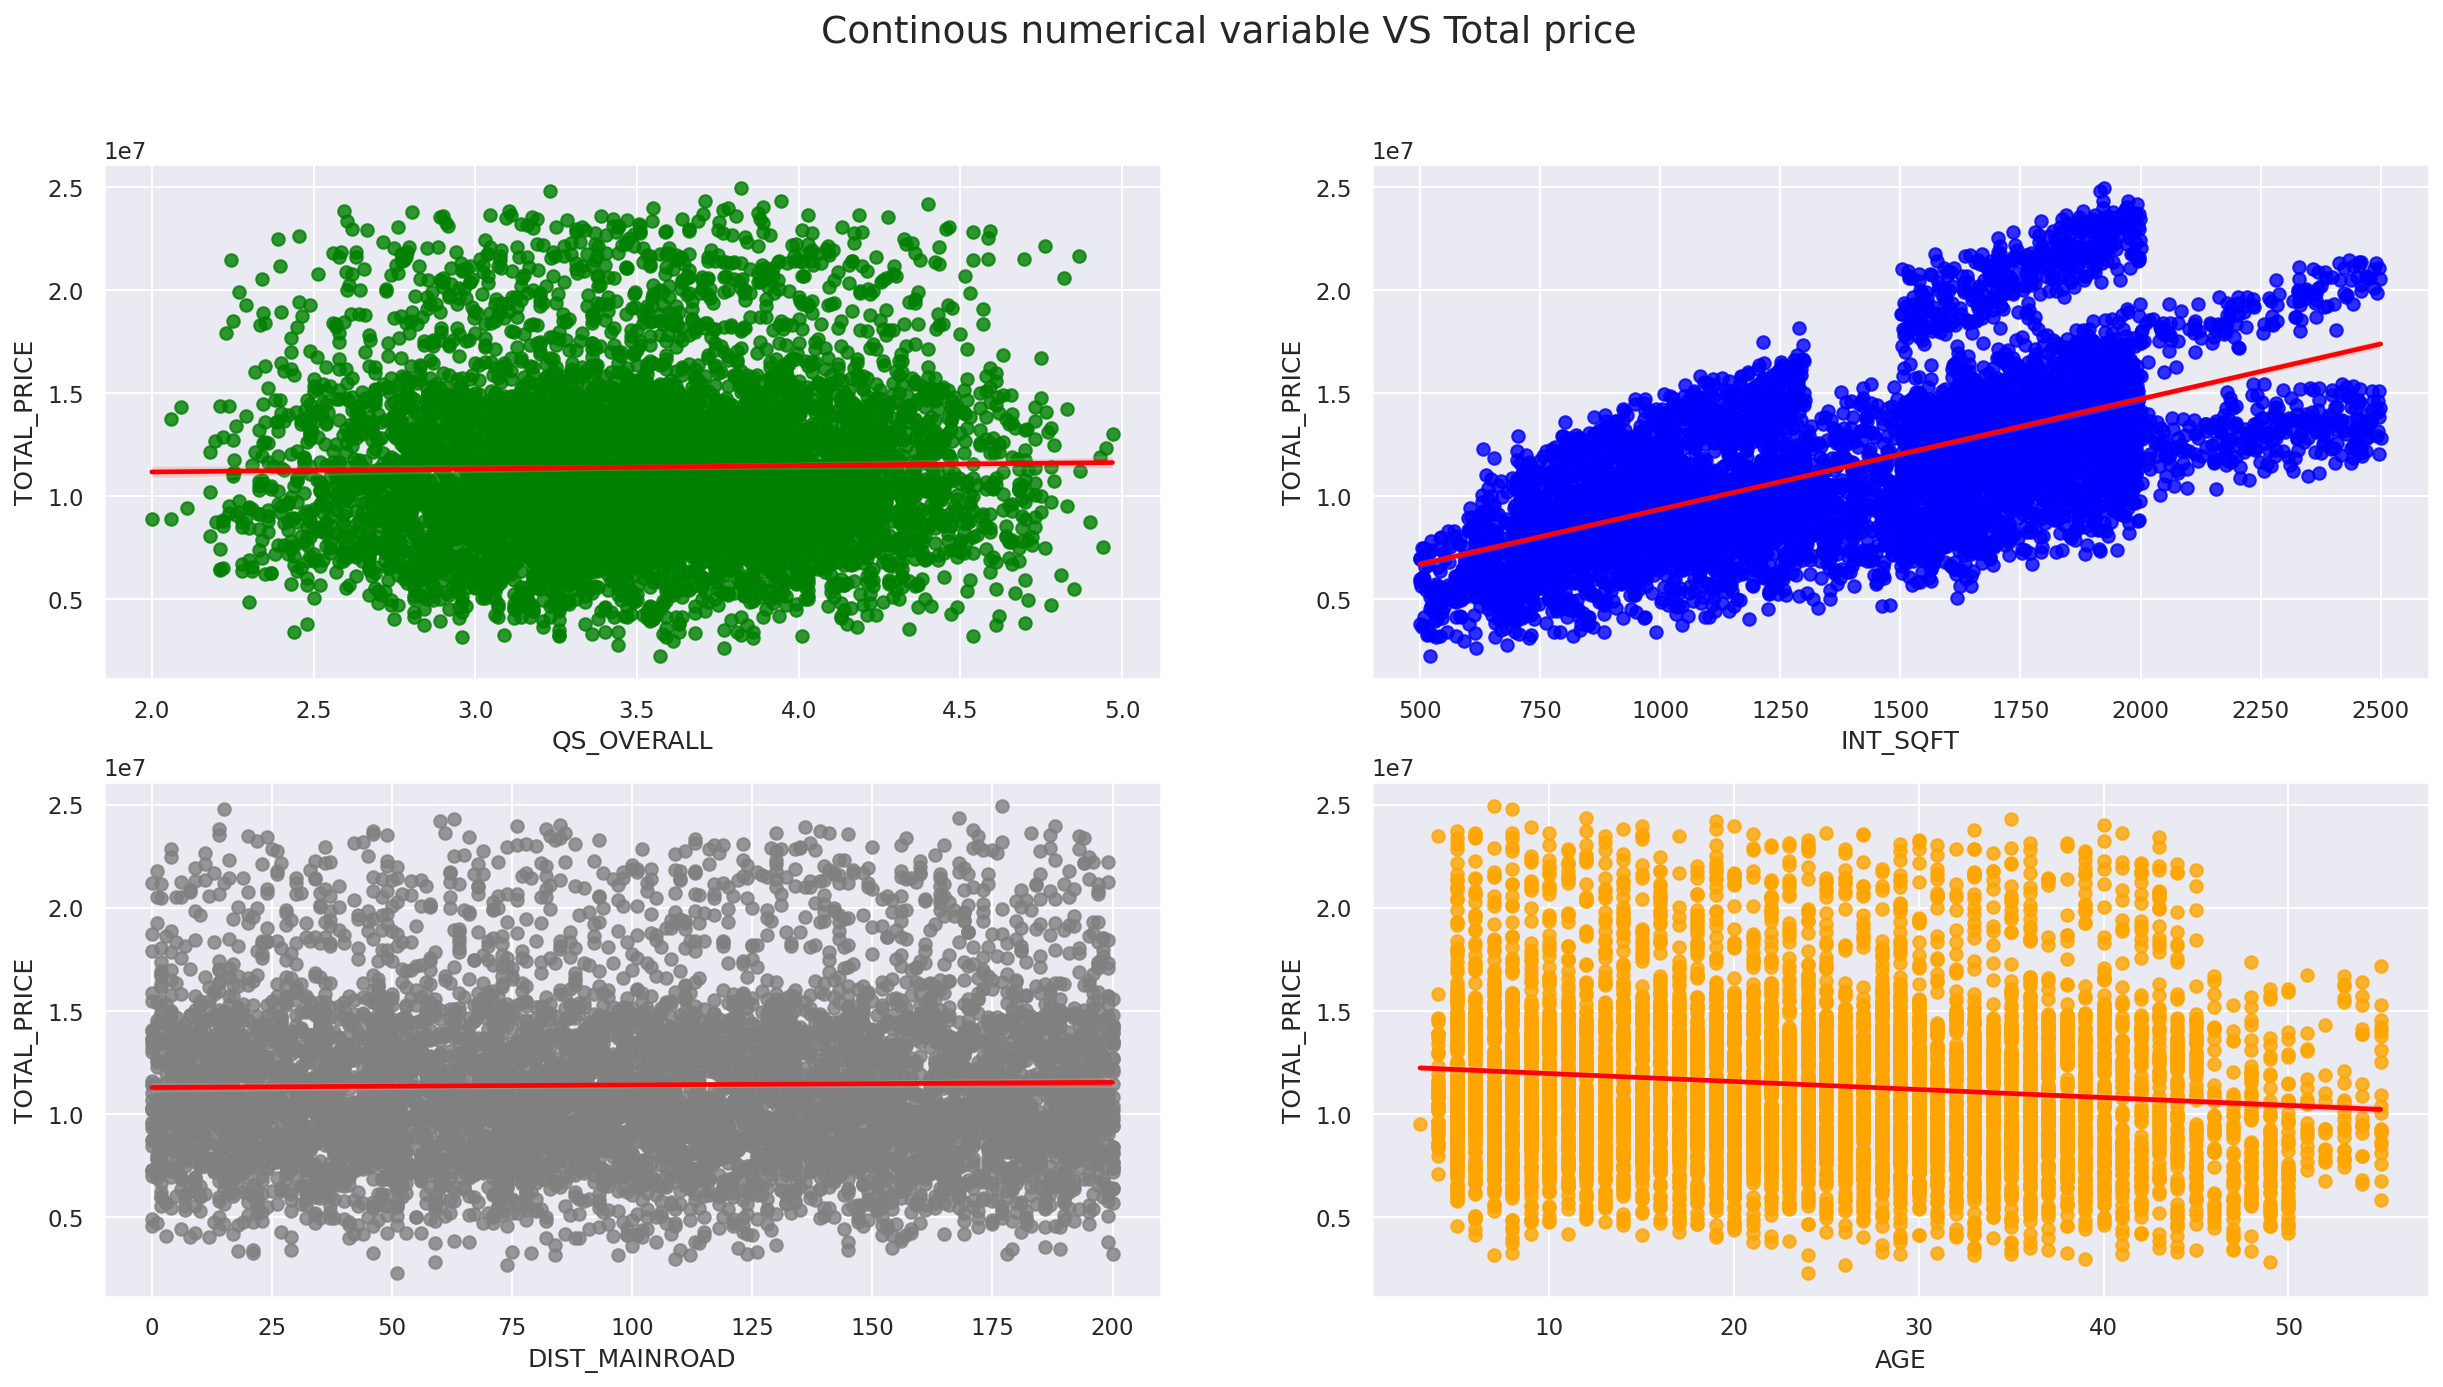

In [147]:
plt.figure(figsize=(20, 10), dpi=150)

plt.subplot(2,2,1)
sns.regplot(df.QS_OVERALL, df.TOTAL_PRICE, scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.subplot(2,2,2)
sns.regplot(df.INT_SQFT, df.TOTAL_PRICE, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.subplot(2,2,3)
sns.regplot(df.DIST_MAINROAD, df.TOTAL_PRICE, scatter_kws={"color": "grey"}, line_kws={"color": "red"})

plt.subplot(2,2,4)
sns.regplot(df.AGE, df.TOTAL_PRICE, scatter_kws={"color": "orange"}, line_kws={"color": "red"})

plt.suptitle("Continous numerical variable VS Total price", fontsize=18)
plt.show()

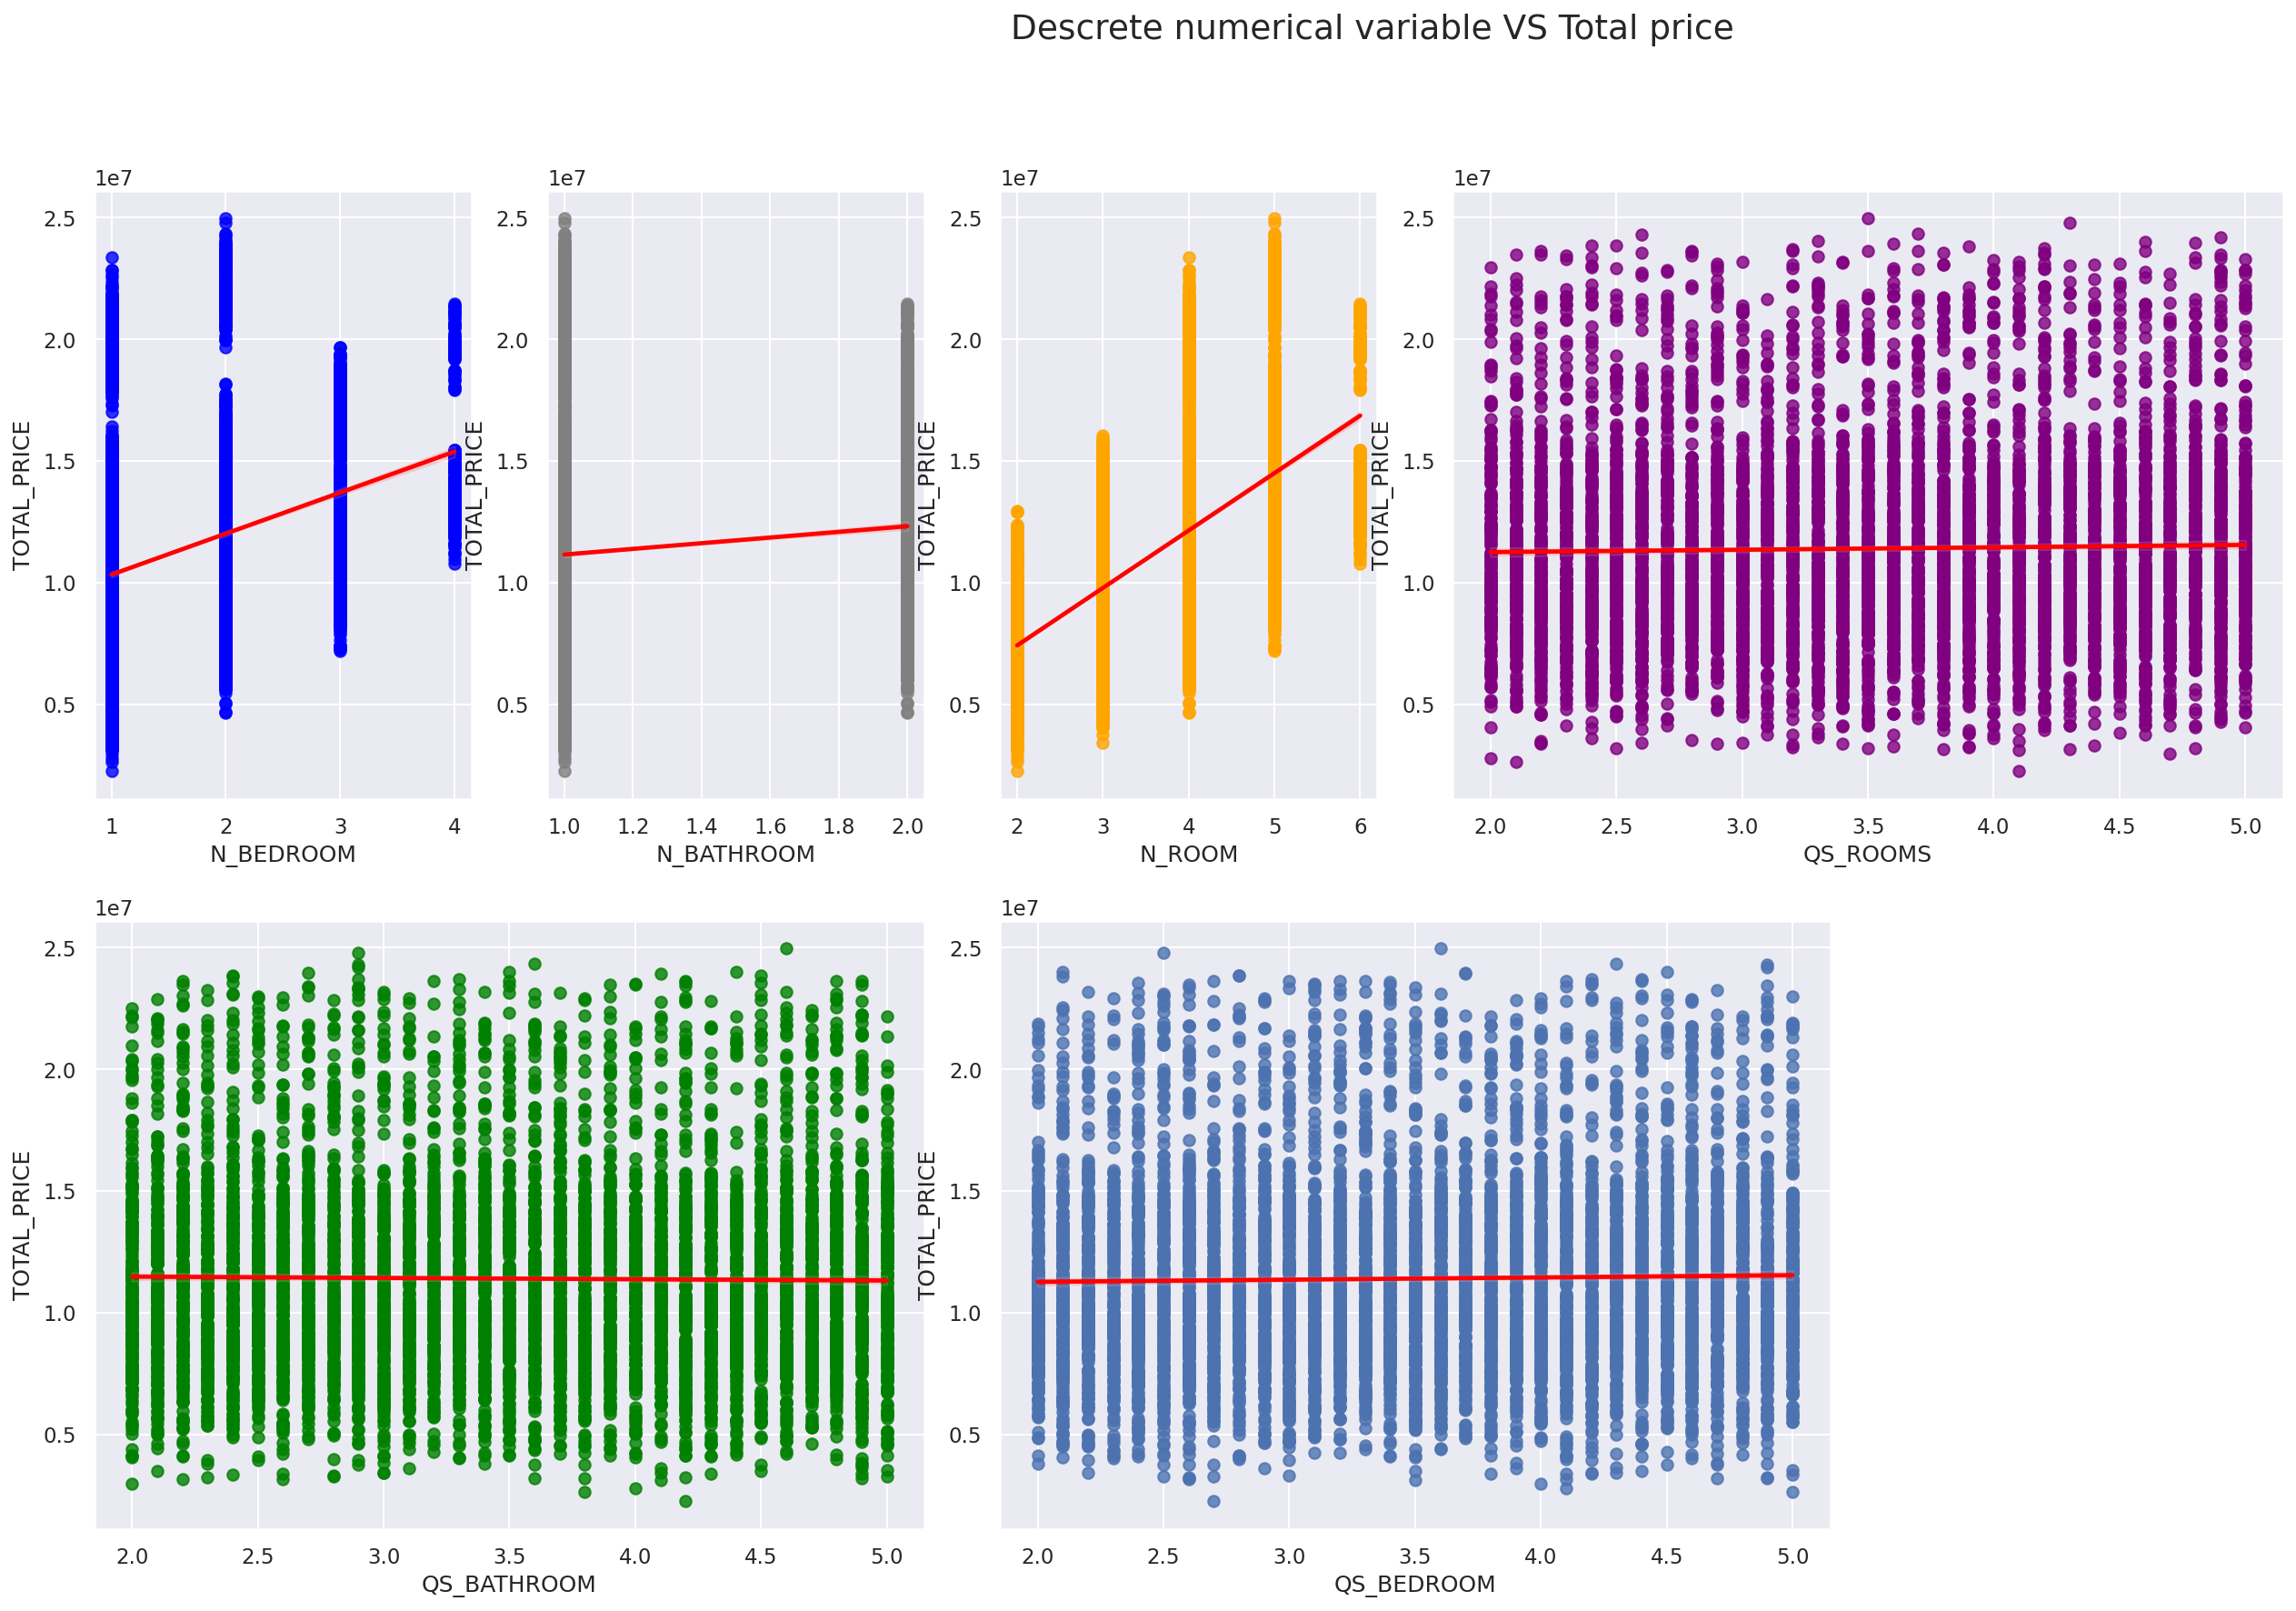

In [148]:
plt.figure(figsize=(25, 13), dpi=150)

plt.subplot2grid((2,6),(0,0))
sns.regplot(df.N_BEDROOM, df.TOTAL_PRICE, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,1))
sns.regplot(df.N_BATHROOM, df.TOTAL_PRICE, scatter_kws={"color": "grey"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,2))
sns.regplot(df.N_ROOM, df.TOTAL_PRICE, scatter_kws={"color": "orange"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,3),colspan=2)
sns.regplot(df.QS_ROOMS, df.TOTAL_PRICE, scatter_kws={"color": "purple"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(1,0),colspan=2)
sns.regplot(df.QS_BATHROOM, df.TOTAL_PRICE, scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(1,2),colspan=2)
sns.regplot(df.QS_BEDROOM, df.TOTAL_PRICE, line_kws={"color": "red"})

plt.suptitle("Descrete numerical variable VS Total price", fontsize=18)
plt.show()

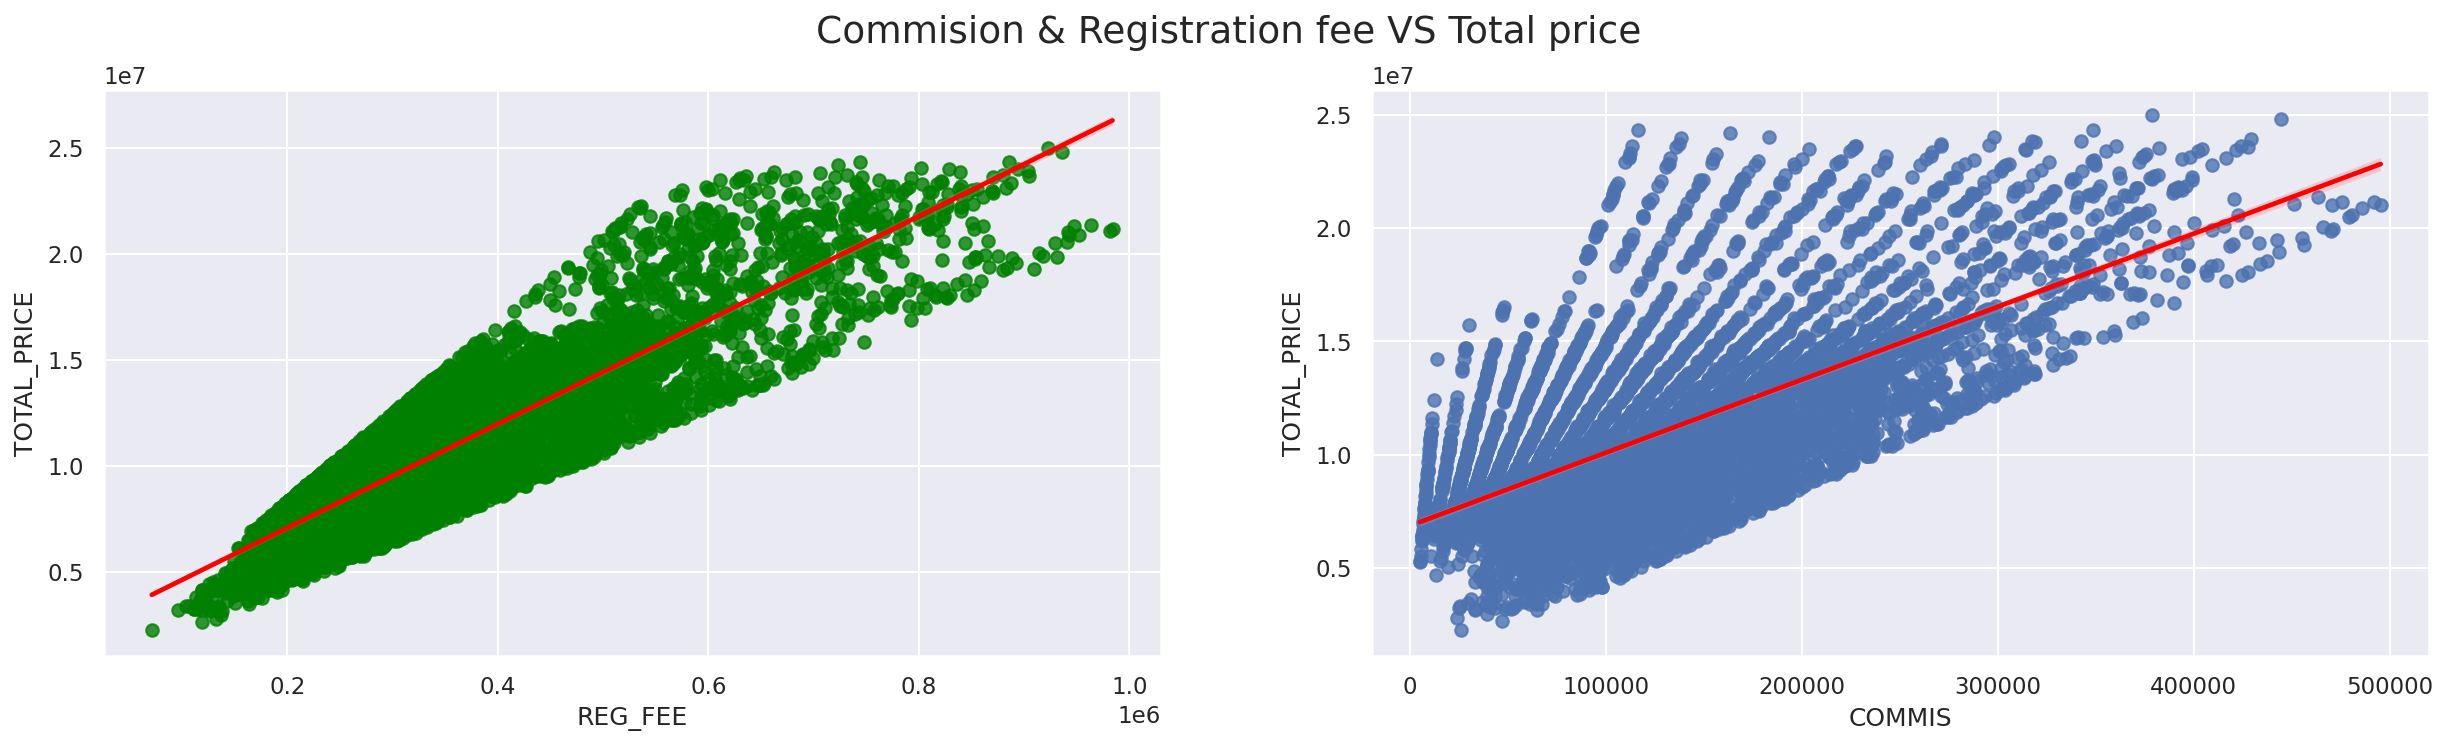

In [149]:
plt.figure(figsize=(20, 5), dpi=150)

plt.subplot(1,2,1)
sns.regplot(df.REG_FEE, df.TOTAL_PRICE, scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.subplot(1,2,2)
sns.regplot(df.COMMIS, df.TOTAL_PRICE, line_kws={"color": "red"})

plt.suptitle("Commision & Registration fee VS Total price", fontsize=18)
plt.show()

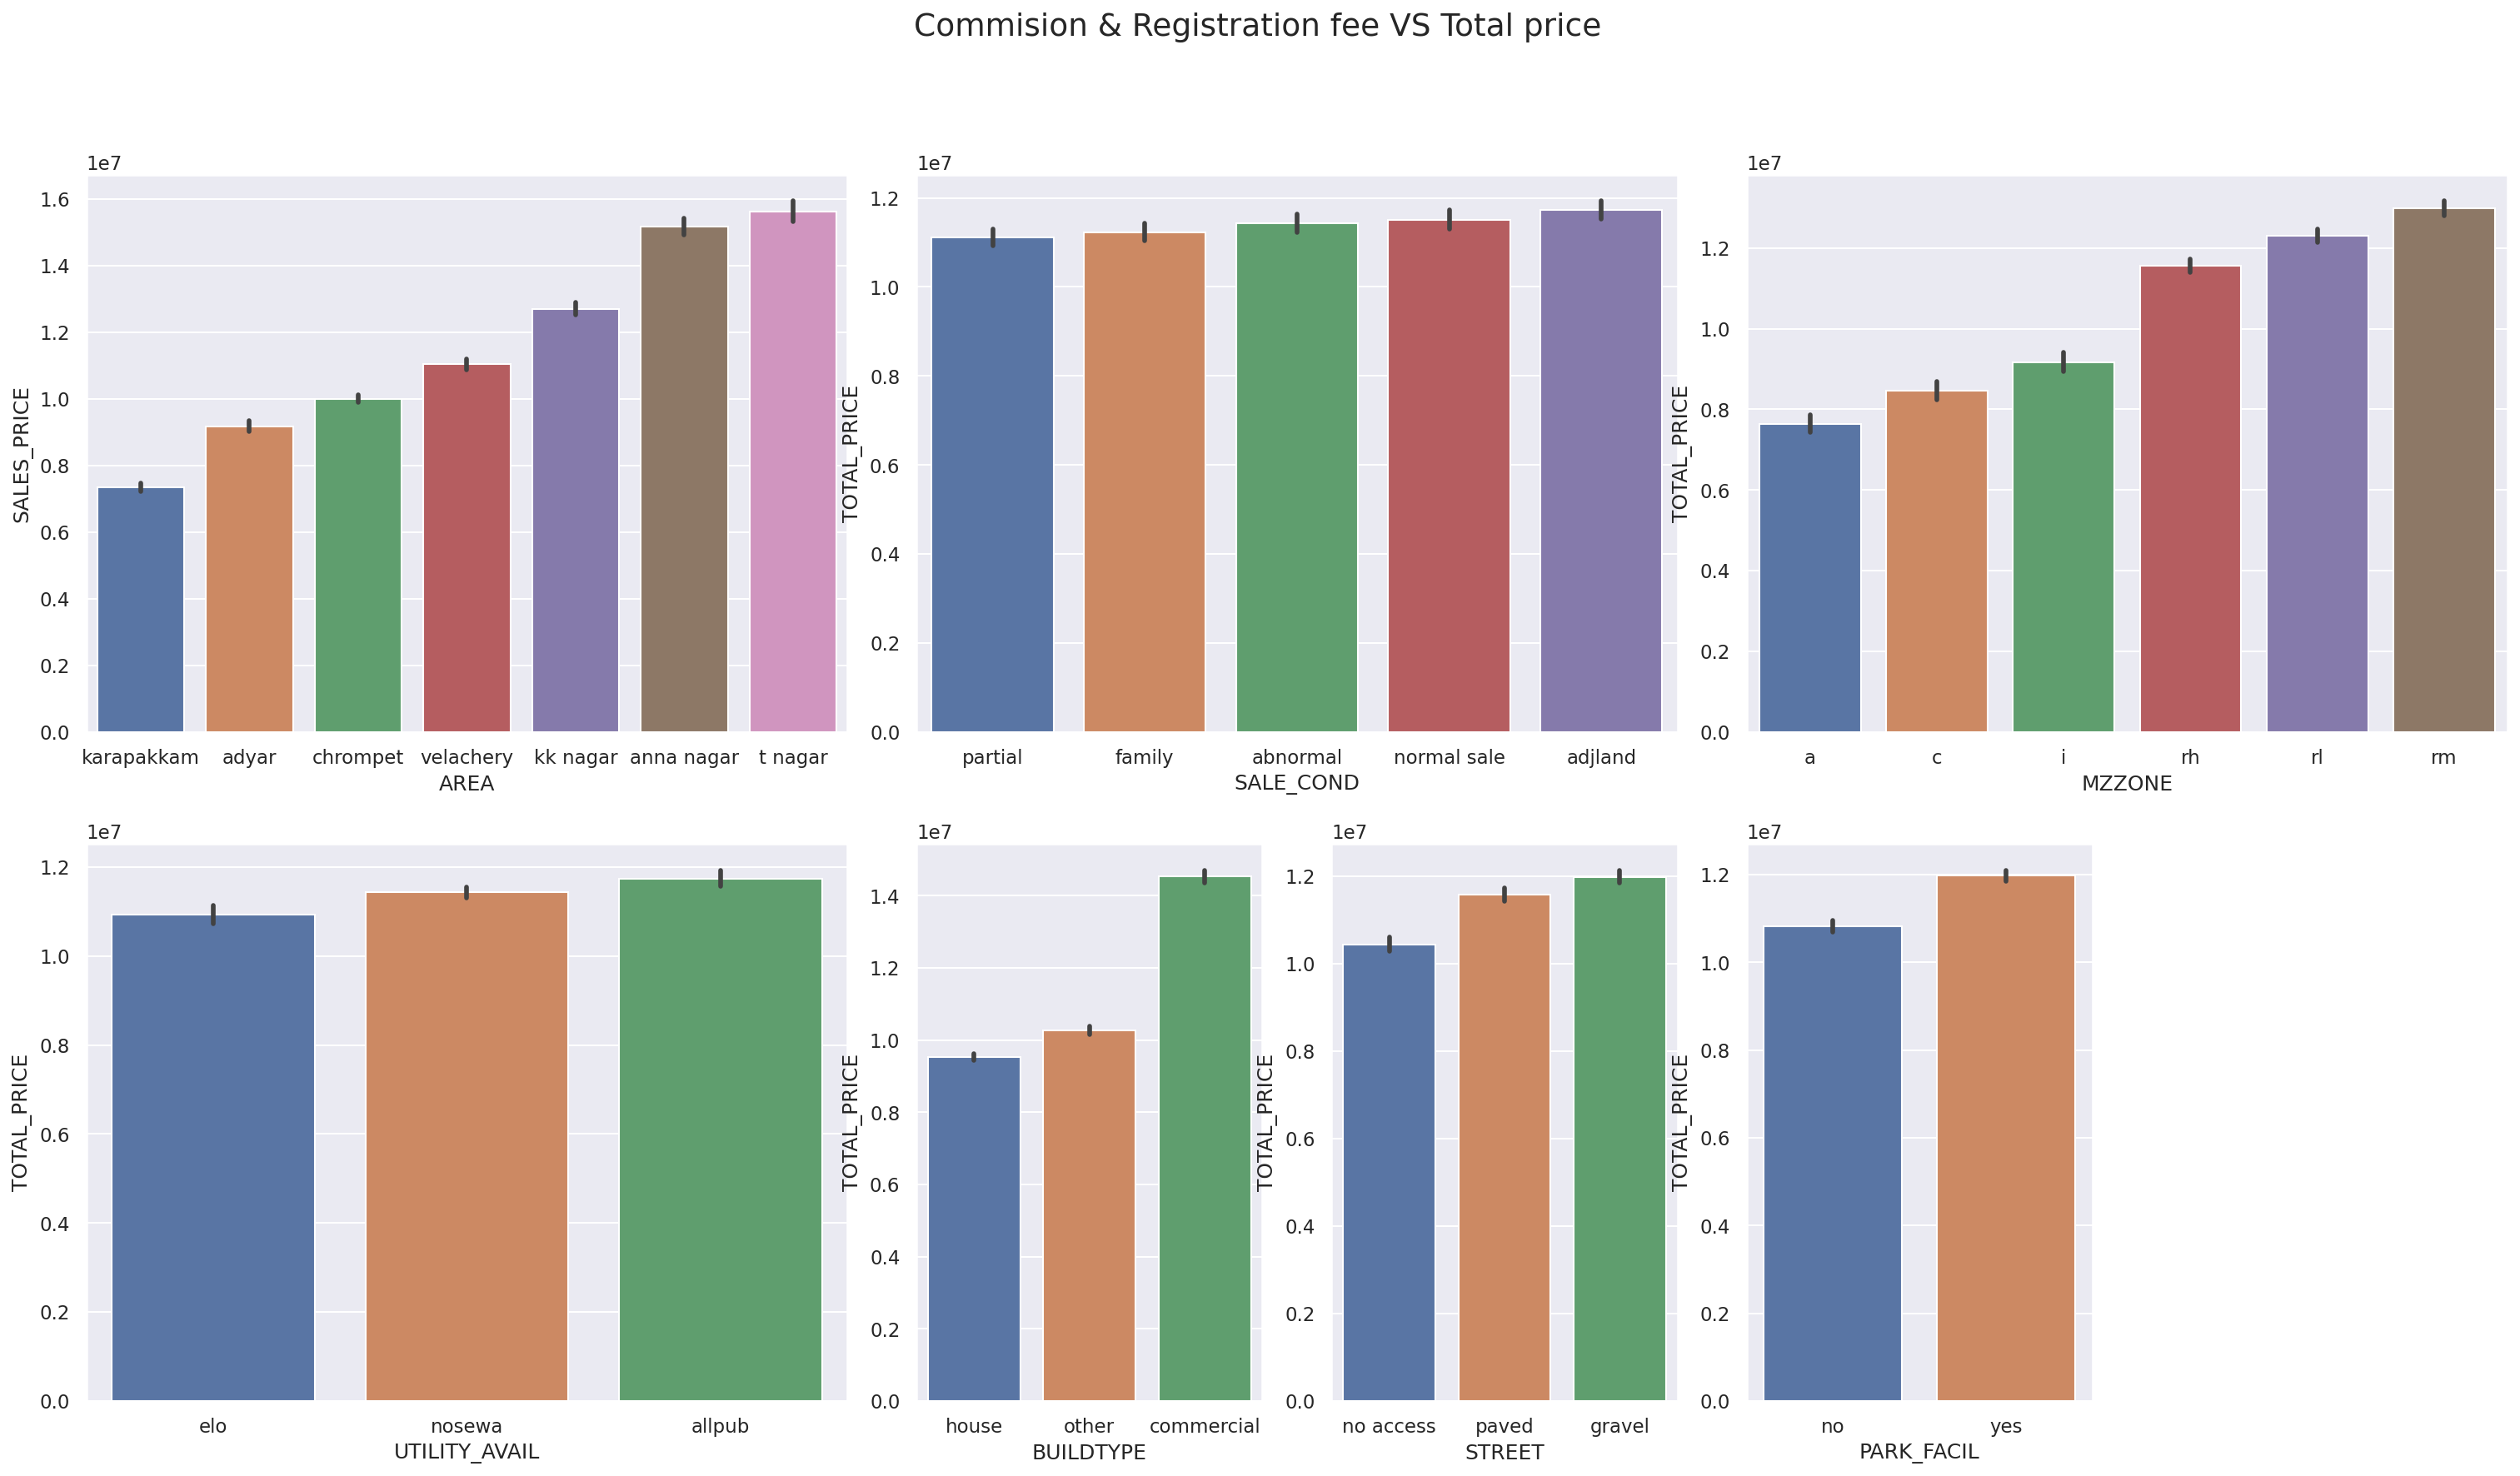

In [150]:
plt.figure(figsize=(25, 13), dpi=150)

plt.subplot2grid((2,6),(0,0),colspan=2)
sns.barplot(x=df.AREA,y=df.SALES_PRICE,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])

plt.subplot2grid((2,6),(0,2),colspan=2)
sns.barplot(x=df.SALE_COND,y=df.TOTAL_PRICE,order=df.groupby('SALE_COND')['TOTAL_PRICE'].mean().reset_index().sort_values('TOTAL_PRICE')['SALE_COND'])

plt.subplot2grid((2,6),(0,4),colspan=2)
sns.barplot(x=df.MZZONE,y=df.TOTAL_PRICE,order=df.groupby('MZZONE')['TOTAL_PRICE'].mean().reset_index().sort_values('TOTAL_PRICE')['MZZONE'])

plt.subplot2grid((2,6),(1,0),colspan=2)
sns.barplot(x=df.UTILITY_AVAIL,y=df.TOTAL_PRICE,order=df.groupby('UTILITY_AVAIL')['TOTAL_PRICE'].mean().reset_index().sort_values('TOTAL_PRICE')['UTILITY_AVAIL'])

plt.subplot2grid((2,6),(1,2))
sns.barplot(x=df.BUILDTYPE,y=df.TOTAL_PRICE,order=df.groupby('BUILDTYPE')['TOTAL_PRICE'].mean().reset_index().sort_values('TOTAL_PRICE')['BUILDTYPE'])

plt.subplot2grid((2,6),(1,3))
sns.barplot(x=df.STREET,y=df.TOTAL_PRICE,order=df.groupby('STREET')['TOTAL_PRICE'].mean().reset_index().sort_values('TOTAL_PRICE')['STREET'])

plt.subplot2grid((2,6),(1,4))
sns.barplot(x=df.PARK_FACIL,y=df.TOTAL_PRICE,order=df.groupby('PARK_FACIL')['TOTAL_PRICE'].mean().reset_index().sort_values('TOTAL_PRICE')['PARK_FACIL'])

plt.suptitle("Commision & Registration fee VS Total price", fontsize=18)
plt.show()

**ENCODING**

In [151]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

df = pd.get_dummies(df, columns=['BUILDTYPE'])

In [152]:
# Encoding the area column order-wise 
df.AREA = df.AREA.map({'karapakkam': 1,
                           'adyar': 2, 
                           'chrompet' : 3,
                           'velachery' : 4,
                           'kk nagar' : 5, 
                           'anna nagar' : 6,
                           't nagar' : 7})
# Encoding the SALE_COND column order-wise 
df.SALE_COND = df.SALE_COND.map({'partial' : 1, 
                                     'family' : 2, 
                                     'abnormal' : 3, 
                                     'normal sale' : 4,
                                     'adjland' : 5})

# Encoding the PARK_FACIL column order-wise 
df.PARK_FACIL = df.PARK_FACIL.map({'yes':1,
                                       'no':0})

# Encoding the UTILITY_AVAIL column order-wise 
df.UTILITY_AVAIL = df.UTILITY_AVAIL.map({'elo' : 1, 
                                             'nosewa' : 2, 
                                             'nosewr ' : 3,
                                             'allpub' : 4})
                                          
# Encoding the STREET column order-wise 
df.STREET = df.STREET.map({'no access' : 1,
                               'paved' : 2, 
                               'gravel' : 3})


# Encoding the MZZONE column order-wise 
df.MZZONE = df.MZZONE.map({'a' : 1,
                               'c' : 2,
                               'i' : 3,
                               'rl' : 5,
                               'rh' : 4,
                               'rm' : 6})

In [153]:
df = df.reindex(columns = ['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE_commercial', 'BUILDTYPE_house','BUILDTYPE_other', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'AGE', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
        'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'TOTAL_PRICE'])

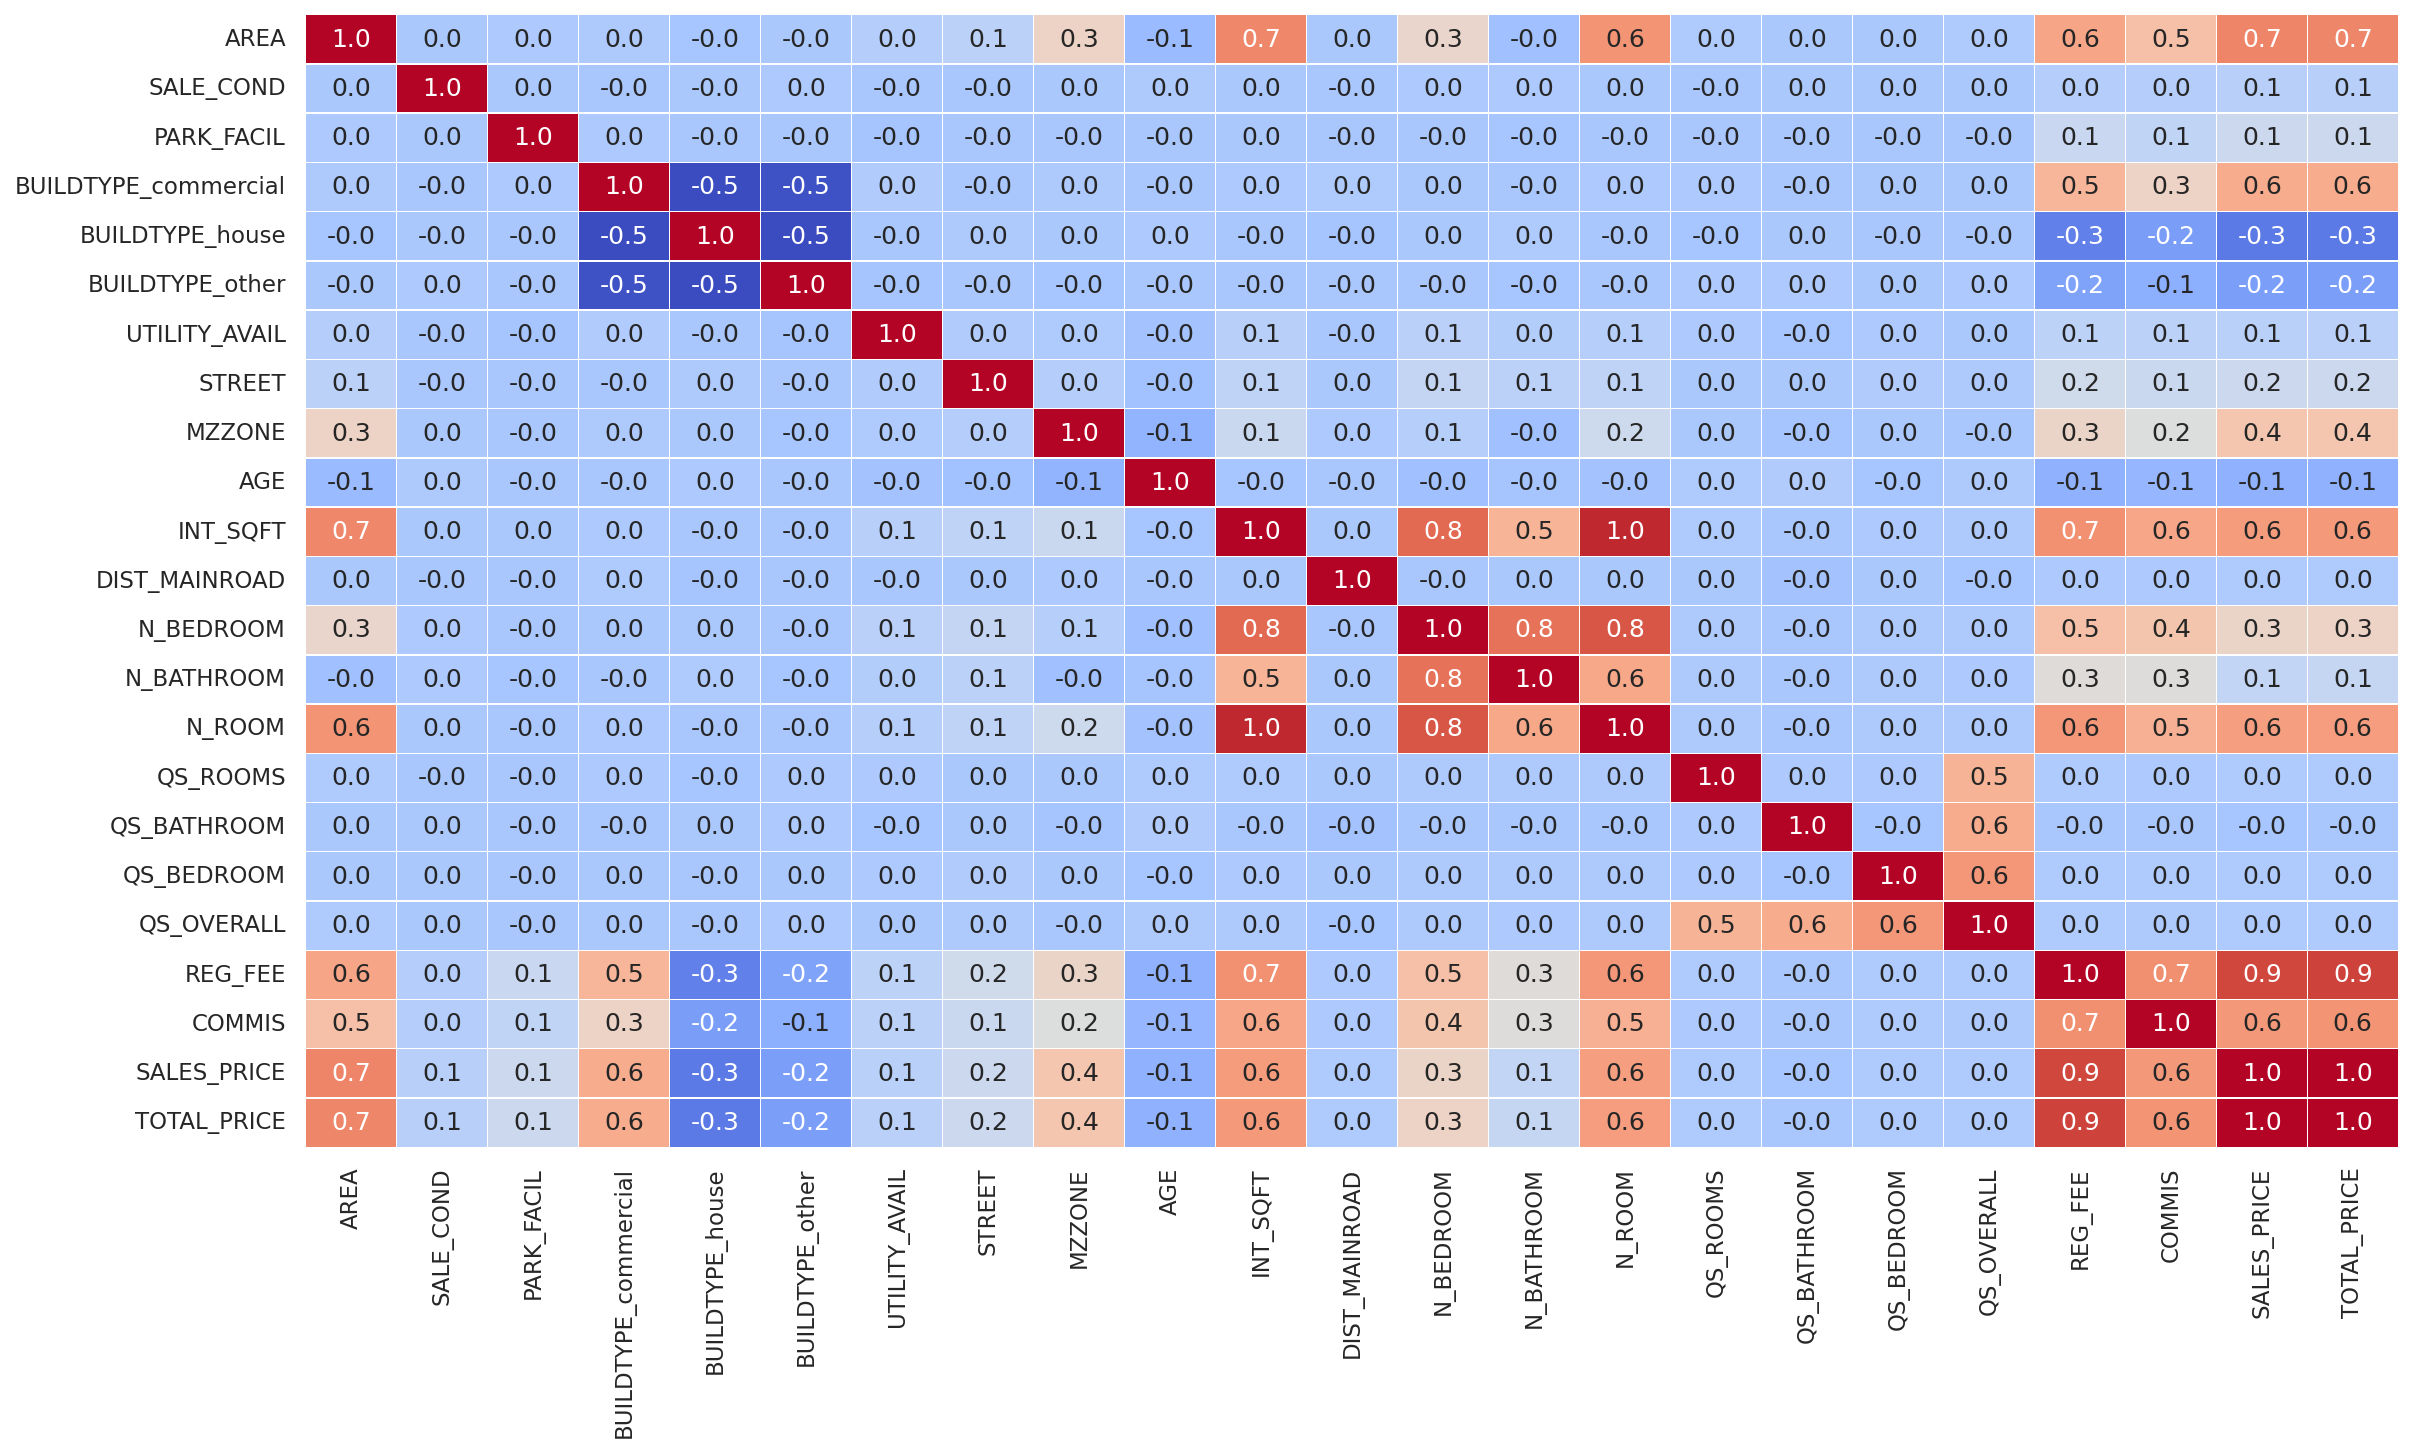

In [154]:
plt.figure(figsize=(18,10), dpi=150)
sns.heatmap(df.corr(method='pearson'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, cmap='coolwarm');

In [155]:
df

AREA  SALE_COND  PARK_FACIL  BUILDTYPE_commercial  BUILDTYPE_house  \
0        1          3           1                     1                0   
1        6          3           0                     1                0   
2        2          3           1                     1                0   
3        4          2           0                     0                0   
4        1          3           1                     0                0   
...    ...        ...         ...                   ...              ...   
7104     1          5           0                     0                0   
7105     4          2           1                     0                0   
7106     4          4           0                     0                1   
7107     1          1           1                     1                0   
7108     4          1           1                     0                0   

      BUILDTYPE_other  UTILITY_AVAIL  STREET  MZZONE  AGE  INT_SQFT  \
0                   0              4       2       1   44      1004   
1                   0              4       3       4   11      1986   
2                   0              1       3       5   20       909   
3                   1              2       2       3   22      1855   
4                   1              4       3       2   30      1226   
...               ...            ...     ...     ...  ...       ...   
7104                1              1       1       6   49       598   
7105                1              2       1       4    9      1897   
7106                0              2       3       3   28      1614   
7107                0              1       2       5   32       787   
7108                1              1       2       3   44      1896   

      DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  QS_ROOMS  QS_BATHROOM  \
0               131          1           1       3       4.0          3.9   
1                26          2           1       5       4.9          4.2   
2                70          1           1       3       4.1          3.8   
3                14          3           2       5       4.7          3.9   
4                84          1           1       3       3.0          2.5   
...             ...        ...         ...     ...       ...          ...   
7104             51          1           1       2       3.0          2.2   
7105             52          3           2       5       3.6          4.5   
7106            152          2           1       4       4.3          4.2   
7107             40          1           1       2       4.6          3.8   
7108            156          3           2       5       3.1          3.5   

      QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  TOTAL_PRICE  
0            4.9       4.330   380000  144400      7600000      8124400  
1            2.5       3.765   760122  304049     21717770     22781941  
2            2.2       3.090   421094   92114     13159200     13672408  
3            3.6       4.010   356321   77042      9630290     10063653  
4            4.1       3.290   237000   74063      7406250      7717313  
...          ...         ...      ...     ...          ...          ...  
7104         2.4       2.520   208767  107060      5353000      5668827  
7105         3.3       3.920   346191  205551     10818480     11370222  
7106         2.9       3.840   317354  167028      8351410      8835792  
7107         4.1       4.160   425350  119098      8507000      9051448  
7108         4.3       3.640   349177   79812      9976480     10405469  

[7056 rows x 23 columns]

In [156]:
data = df.copy()
data.drop(['DIST_MAINROAD', 'QS_OVERALL', 'QS_BATHROOM','QS_BEDROOM','QS_ROOMS','REG_FEE','COMMIS'], axis=1, inplace=True)

In [157]:
input_cols = ['AREA', 'SALE_COND','PARK_FACIL','BUILDTYPE_commercial','BUILDTYPE_house','BUILDTYPE_other','UTILITY_AVAIL','STREET',
              'MZZONE','AGE','INT_SQFT','N_BEDROOM','N_BATHROOM','N_ROOM']
target_cols = 'SALES_PRICE'
target1_cols = 'TOTAL_PRICE'

input = data[input_cols].copy()
target = data[target_cols].copy()
target1 = data[target1_cols].copy()

**Split**

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state = 7)

**Scalling**

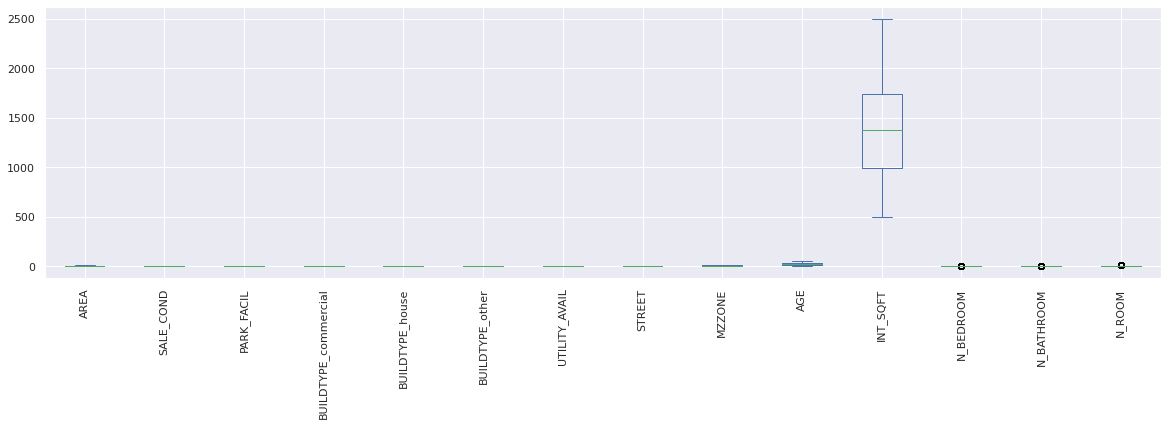

In [159]:
pd.DataFrame(X_train, columns=X_train.columns).plot.box(figsize=(20,5), rot=90)
plt.show()

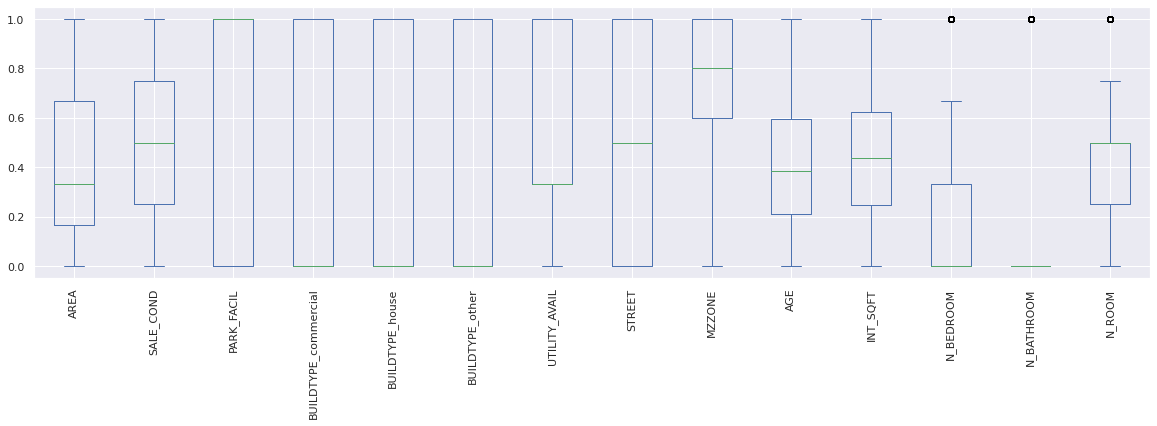

In [160]:
mm = MinMaxScaler().fit(X_train)
X_train_mm = mm.transform(X_train)
X_train_mm = pd.DataFrame(X_train_mm, columns=X_train.columns)
X_test_mm = mm.transform(X_test)
X_test_mm = pd.DataFrame(X_test_mm, columns=X_test.columns)
X_train_mm.plot.box(figsize=(20,5), rot=90)
plt.show()

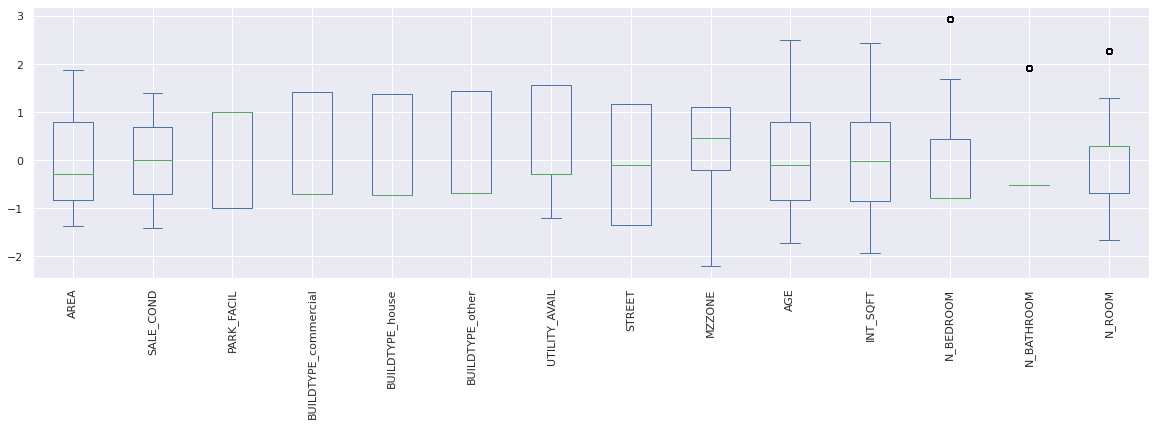

In [161]:
ss = StandardScaler().fit(X_train)
X_train_ss = ss.transform(X_train)
X_train_ss = pd.DataFrame(X_train_ss, columns=X_train.columns)
X_test_ss = ss.transform(X_test)
X_test_ss = pd.DataFrame(X_test_ss, columns=X_test.columns)
X_train_ss.plot.box(figsize=(20,5), rot=90)
plt.show()

**LinearRegression**

In [162]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

# lr = LinearRegression()
lr.fit(X_train_ss, y_train)
y_predlrss = lr.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_predlrss))

# lr = LinearRegression()
lr.fit(X_train_mm, y_train)
y_predlrmm = lr.predict(X_test_mm)
print('R2- SCORE(Minmaxscaled):', metrics.r2_score(y_test,y_predlrmm))

R2- SCORE: 0.9234581109949949
R2- SCORE(Standardscaler): 0.9235958256687478
R2- SCORE(Minmaxscaled): 0.923458495985745


**KNearestNeighbors**

Orange and Blue depict RSME for MinMaxScaler and blue


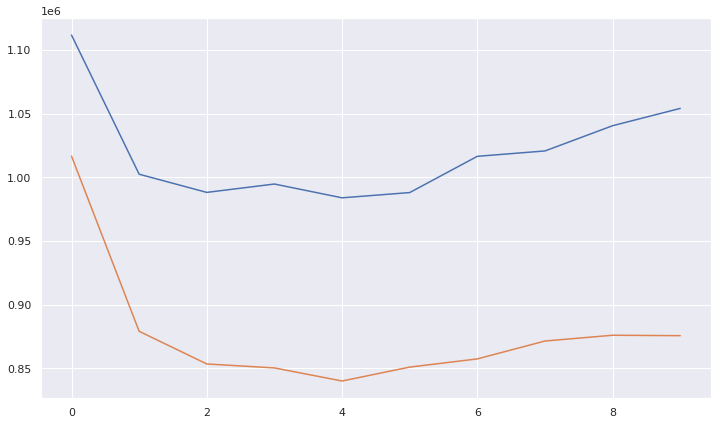

In [164]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor

rmse_val = []
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train_mm, y_train)
    pred=model.predict(X_test_mm)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
curve = pd.DataFrame(rmse_val)

rmse_val1 = []
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train_ss, y_train)
    pred=model.predict(X_test_ss)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val1.append(error)
curve1 = pd.DataFrame(rmse_val1)

print('Orange and Blue depict RSME for MinMaxScaler and blue')
plt.figure(figsize=(12,7))
plt.plot(curve)
plt.plot(curve1)
plt.show()


In [165]:
knn = KNeighborsRegressor(n_neighbors=100)
knn.fit(X_train, y_train)
y_predknn = knn.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_predknn))

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_mm, y_train)
y_predknn_mm = knn.predict(X_test_mm)
print('R2- SCORE(Minmaxscaled):', metrics.r2_score(y_test,y_predknn_mm))

knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train_ss, y_train)
y_predknn_ss = knn.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_predknn_ss))

R2- SCORE: 0.4336435807704704
R2- SCORE(Minmaxscaled): 0.9312093306940163
R2- SCORE(Standardscaler): 0.9490598115277921


**DecisionTree**

In [166]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_dt))

dt.fit(X_train_mm, y_train)
y_pred_dtmm = dt.predict(X_test_mm)
print('R2- SCORE(Minmaxscaled):', metrics.r2_score(y_test,y_pred_dtmm))

dt.fit(X_train_ss, y_train)
y_pred_dtss = dt.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_dtss))

R2- SCORE: 0.9755969574777985
R2- SCORE(Minmaxscaled): 0.9753365245122179
R2- SCORE(Standardscaler): 0.9753779145165958


**Voting Regressor**

In [167]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn import tree
import xgboost as xgb


dt = DecisionTreeRegressor()
knn = KNeighborsRegressor(n_neighbors=100)
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators= 100, max_depth = 15, max_features='sqrt')
xg = xgb.XGBRegressor(learning_rate = .7, n_estimators=100, verbosity = 0)
gbr = GradientBoostingRegressor(learning_rate=.5)
etr = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)

vr = VotingRegressor([('dt', dt), ('knn', knn), ('lr', lr), ('rf', rf), ('xg', xg), ('gbr', gbr), ('etr', etr)])

vr.fit(X_train, y_train);
y_pred_vr = vr.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_vr))

vr.fit(X_train_ss, y_train);
y_pred_vrss = vr.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_vrss))

vr.fit(X_train_mm, y_train);
y_pred_vrmm = vr.predict(X_test_mm)
print('R2- SCORE(MinMaxScaler):', metrics.r2_score(y_test,y_pred_vr))

R2- SCORE: 0.9790764325405873
R2- SCORE(Standardscaler): 0.9898679522784486
R2- SCORE(MinMaxScaler): 0.9790764325405873


**Random Forest**

In [168]:
rf = RandomForestRegressor(n_estimators= 100, max_depth = 15, max_features='sqrt')
rf.fit(X_train, y_train);
y_pred_rf = rf.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_rf))

rf.fit(X_train_mm, y_train);
y_pred_rfmm = rf.predict(X_test_mm)
print('R2- SCORE(minmaxscaled):', metrics.r2_score(y_test,y_pred_rfmm))

rf.fit(X_train_ss, y_train);
y_pred_rfss = rf.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_rfss))

R2- SCORE: 0.9872861523386016
R2- SCORE(minmaxscaled): 0.9871887057711387
R2- SCORE(Standardscaler): 0.987326639600309


**Extra Tree Regressor**

In [169]:
etr = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)
y_pred_etr = etr.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_etr))

y_pred_etrmm = etr.predict(X_test_mm)
print('R2- SCORE(minmaxscaled):', metrics.r2_score(y_test,y_pred_etrmm))

y_pred_etrss = etr.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_etrss))

R2- SCORE: 0.9910129922278318
R2- SCORE(minmaxscaled): -3.4902538996657446
R2- SCORE(Standardscaler): -2.9155679515864477


**GradientBoostingRegressor**

In [170]:
for lr in [0.1,0.3,0.5,0.8,1]:
  model= GradientBoostingRegressor(learning_rate=lr)
  model.fit(X_train, y_train)
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Test score : ", model.score(X_test,y_test))

Learning rate :  0.1  Train score :  0.9920436844069143  Test score :  0.9913603562397837
Learning rate :  0.3  Train score :  0.9969569035113263  Test score :  0.9961540337103711
Learning rate :  0.5  Train score :  0.997935613566575  Test score :  0.9971214657232383
Learning rate :  0.8  Train score :  0.9978387808610382  Test score :  0.9962425230073578
Learning rate :  1  Train score :  0.9975324687090531  Test score :  0.9963586707839228


In [171]:
gbr = GradientBoostingRegressor(learning_rate=.5)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_gbr))

gbr.fit(X_train_mm, y_train)
y_pred_gbrmm = gbr.predict(X_test_mm)
print('R2- SCORE(MinMaxScaler):', metrics.r2_score(y_test,y_pred_gbrmm))

gbr.fit(X_train_ss, y_train)
y_pred_gbrss = gbr.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_gbrss))

R2- SCORE: 0.9971214657232383
R2- SCORE(MinMaxScaler): 0.997122274246788
R2- SCORE(Standardscaler): 0.9971086475449732


**XGBoost**

In [172]:
for lr in [0.2,0.5,0.7,0.8,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0)
  model.fit(X_train, y_train)
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Test score : ", model.score(X_test,y_test))

Learning rate :  0.2  Train score :  0.9967151022743157  Test score :  0.9961114261193005
Learning rate :  0.5  Train score :  0.9974732931097402  Test score :  0.9967758211704754
Learning rate :  0.7  Train score :  0.9979595691210792  Test score :  0.9971340591059015
Learning rate :  0.8  Train score :  0.9976528290576275  Test score :  0.9963397087669941
Learning rate :  1  Train score :  0.9976555248870486  Test score :  0.9966622889769875


In [173]:
xg = xgb.XGBRegressor(learning_rate = .7, n_estimators=100, verbosity = 0)
xg.fit(X_train, y_train)
y_pred_gbr = xg.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_gbr))

xg.fit(X_train_mm, y_train)
y_pred_gbrmm = xg.predict(X_test_mm)
print('R2- SCORE(MinMaxScaler):', metrics.r2_score(y_test,y_pred_gbrmm))

xg.fit(X_train_ss, y_train)
y_pred_gbrss = xg.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_gbrss))

R2- SCORE: 0.9971340591059015
R2- SCORE(MinMaxScaler): 0.9971340591059015
R2- SCORE(Standardscaler): 0.9971340591059015
